In [1]:
#install libraries and packages to use with environment for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

data = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#renaming unclear variables.
data = data.rename(columns = { "Item1": "Timely_Respd", "Item2": "Timely_Fixes",
                                "Item3": "Timely_Replc", "Item4": "Reliability", "Item5": "Options",
                                "Item6": "Respect_Resp", "Item7": "Courteous_Exch", 
                                "Item8": "Evidence_ActListen"})

In [4]:
data.shape

(10000, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# checking for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#summary statistics
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
#data cleaning, locating any duplicates
duplicates = data.duplicated('Customer_id')
data_duplicated = data[duplicates].sort_values(by='Customer_id')
print(data_duplicated[['Customer_id']])

Empty DataFrame
Columns: [Customer_id]
Index: []


In [9]:
#data cleaning, looking for null values
data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [10]:
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'],
      dtype='object')

In [11]:
#data cleaning, finding outliers

def find_outliers(df, var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1-(1.5*IQR)
    upperbound = q3+(1.5*IQR)
    outliers = df[var][((df[var] < (lowerbound)) | (df[var] > (upperbound)))]
    return outliers

#running created function on quantitative variables

outliers = find_outliers(data, 'Population')
print("number of outliers in Population: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Children')
print("number of outliers in Children: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Age')
print("number of outliers in Age: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Income')
print("number of outliers in Income: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Outage_sec_perweek')
print("number of outliers in Outage_sec_perweek: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Email')
print("number of outliers in Email: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Contacts')
print("number of outliers in Contacts: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Yearly_equip_failure')
print("number of outliers in Yearly_equip_failure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Tenure')
print("number of outliers in Tenure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'MonthlyCharge')
print("number of outliers in MonthlyCharge: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Bandwidth_GB_Year')
print("number of outliers in Bandwidth_GB_Year: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))


number of outliers in Population: 937
max outlier value: 111850
min outlier value: 31816
number of outliers in Children: 401
max outlier value: 10
min outlier value: 8
number of outliers in Age: 0
max outlier value: nan
min outlier value: nan
number of outliers in Income: 336
max outlier value: 258900.7
min outlier value: 104362.5
number of outliers in Outage_sec_perweek: 76
max outlier value: 21.20723
min outlier value: 0.09974694
number of outliers in Email: 38
max outlier value: 23
min outlier value: 1
number of outliers in Contacts: 8
max outlier value: 7
min outlier value: 6
number of outliers in Yearly_equip_failure: 94
max outlier value: 6
min outlier value: 3
number of outliers in Tenure: 0
max outlier value: nan
min outlier value: nan
number of outliers in MonthlyCharge: 0
max outlier value: nan
min outlier value: nan
number of outliers in Bandwidth_GB_Year: 0
max outlier value: nan
min outlier value: nan


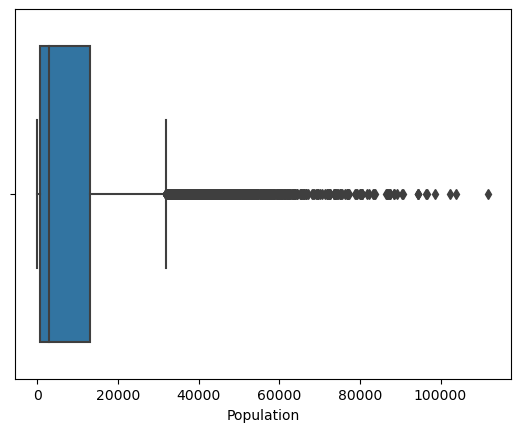

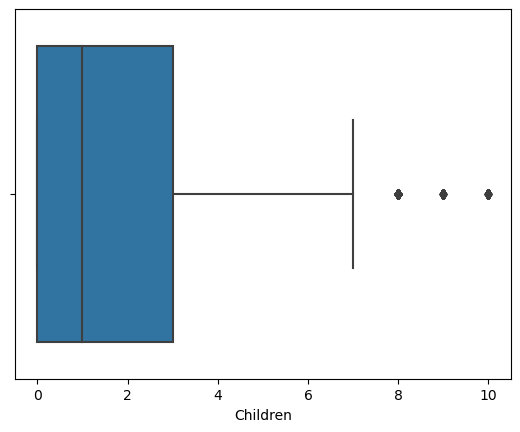

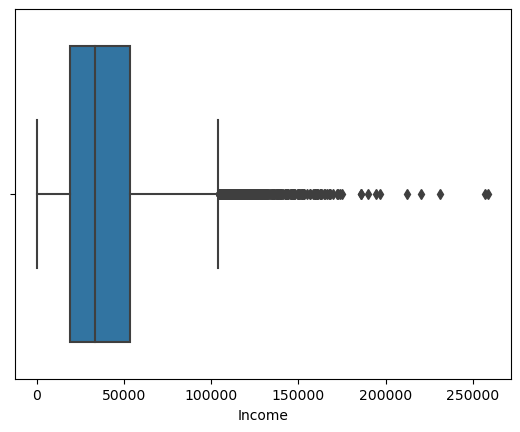

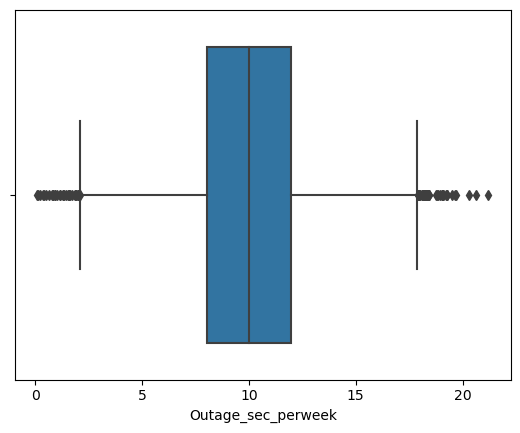

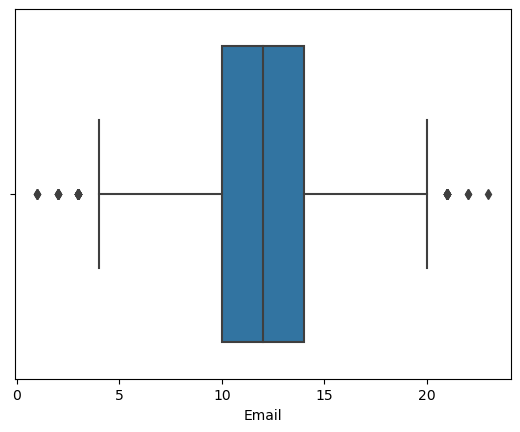

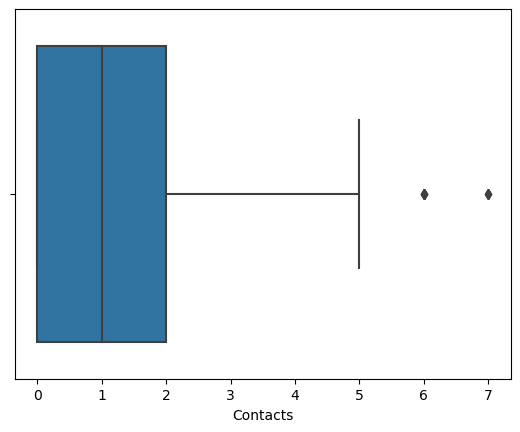

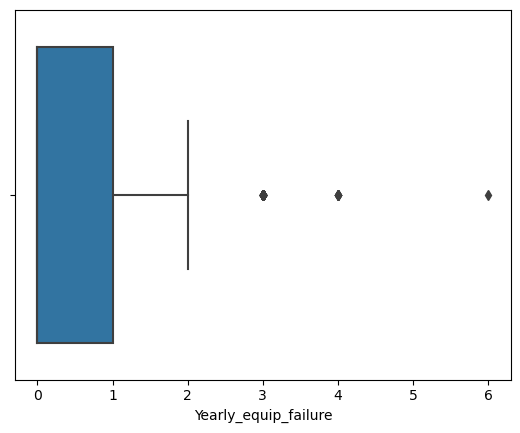

In [12]:
#boxplotting all variables showing outliers

boxplot=sn.boxplot(x='Population',data=data)
plt.show()
boxplot=sn.boxplot(x='Children',data=data)
plt.show()
boxplot=sn.boxplot(x='Income',data=data)
plt.show()
boxplot=sn.boxplot(x='Outage_sec_perweek',data=data)
plt.show()
boxplot=sn.boxplot(x='Email',data=data)
plt.show()
boxplot=sn.boxplot(x='Contacts',data=data)
plt.show()
boxplot=sn.boxplot(x='Yearly_equip_failure',data=data)
plt.show()

In [13]:
#treating outliers found.

def find_boundary(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower , upper


lower_pop, upper_pop = find_boundary(data, 'Population' )
print("Upper limit for population is" , upper_pop)
print("Lower limit for population is" , lower_pop)
data.Population = np.where(data.Population > upper_pop, upper_pop,
                               np.where(data.Population < lower_pop, lower_pop, data.Population))

lower_kid, upper_kid = find_boundary(data, 'Children')
print("Upper limit for children is" , upper_kid)
print("Lower limit for children is" , lower_kid)
data.Children = np.where(data.Children > upper_kid, upper_kid,
                               np.where(data.Children < lower_kid, lower_kid, data.Children))

lower_inc, upper_inc = find_boundary(data, 'Income')
print("Upper limit for Income is" , upper_inc)
print("Lower limit for Income is" , lower_inc)
data.Income = np.where(data.Income > upper_inc, upper_inc,
                               np.where(data.Income < lower_inc, lower_inc, data.Income))

lower_osp, upper_osp = find_boundary(data, 'Outage_sec_perweek')
print("Upper limit for Outage_sec_perweek is" , upper_osp)
print("Lower limit for Outage_sec_perweek is" , lower_osp)
data.Outage_sec_perweek = np.where(data.Outage_sec_perweek > upper_osp, upper_osp,
                               np.where(data.Outage_sec_perweek < lower_osp, lower_osp, data.Outage_sec_perweek))

lower_eml, upper_eml = find_boundary(data, 'Email')
print("Upper limit for email is" , upper_eml)
print("Lower limit for email is" , lower_eml)
data.Email = np.where(data.Email > upper_eml, upper_eml,
                               np.where(data.Email < lower_eml, lower_eml, data.Email))

lower_contct, upper_contct = find_boundary(data, 'Contacts')
print("Upper limit for contacts is" , upper_contct)
print("Lower limit for contacts is" , lower_contct)
data.Contacts = np.where(data.Contacts > upper_contct, upper_contct,
                               np.where(data.Contacts < lower_contct, lower_contct, data.Contacts))

lower_yef, upper_yef = find_boundary(data, 'Yearly_equip_failure')
print("Upper limit for Yearly_equip_failure is" , upper_yef)
print("Lower limit for Yearly_equip_failure is" , lower_yef)
data.Yearly_equip_failure = np.where(data.Yearly_equip_failure > upper_yef, upper_yef,
                               np.where(data.Yearly_equip_failure < lower_yef, lower_yef, data.Yearly_equip_failure))


Upper limit for population is 31813.0
Lower limit for population is -17907.0
Upper limit for children is 7.5
Lower limit for children is -4.5
Upper limit for Income is 104278.34875
Lower limit for Income is -31807.46125
Upper limit for Outage_sec_perweek is 17.8963915
Lower limit for Outage_sec_perweek is 2.0913075
Upper limit for email is 20.0
Lower limit for email is 4.0
Upper limit for contacts is 5.0
Lower limit for contacts is -3.0
Upper limit for Yearly_equip_failure is 2.5
Lower limit for Yearly_equip_failure is -1.5


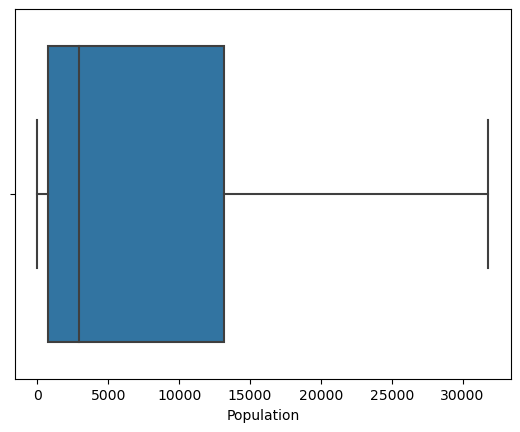

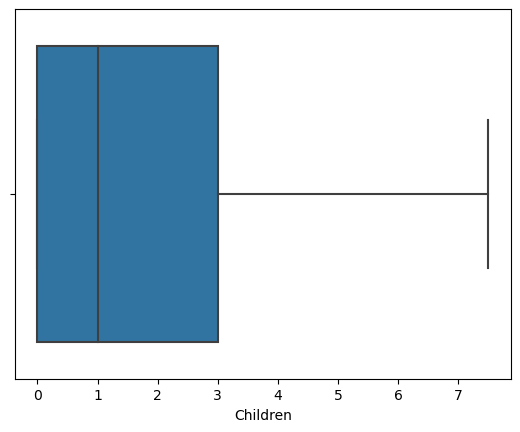

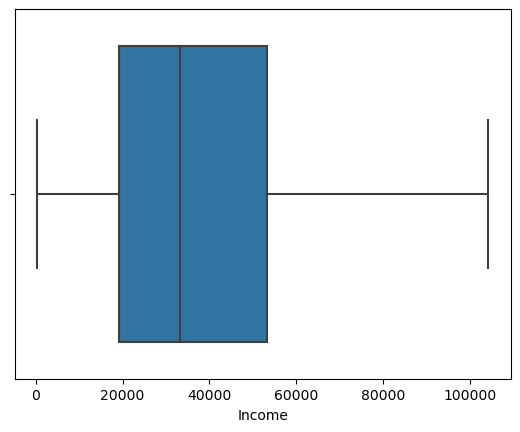

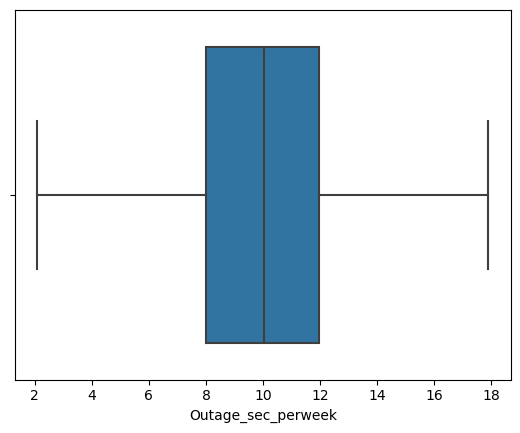

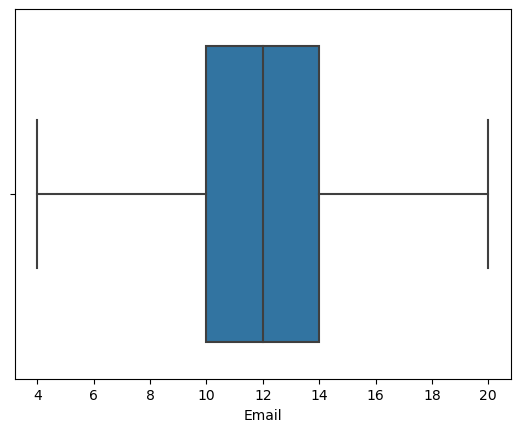

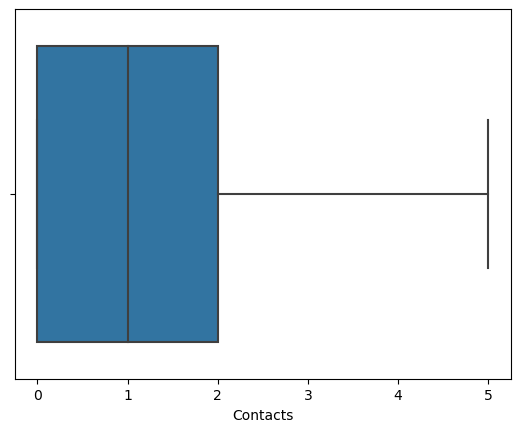

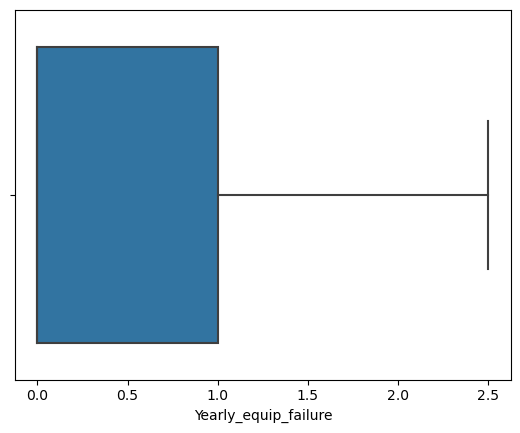

In [14]:
#re-boxplotting all variables showing outliers resolved

boxplot=sn.boxplot(x='Population',data=data)
plt.show()
boxplot=sn.boxplot(x='Children',data=data)
plt.show()
boxplot=sn.boxplot(x='Income',data=data)
plt.show()
boxplot=sn.boxplot(x='Outage_sec_perweek',data=data)
plt.show()
boxplot=sn.boxplot(x='Email',data=data)
plt.show()
boxplot=sn.boxplot(x='Contacts',data=data)
plt.show()
boxplot=sn.boxplot(x='Yearly_equip_failure',data=data)
plt.show()

In [15]:
#dropping categorical variables
data.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Churn',
       'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'], axis=1, inplace=True)

In [16]:
#confirming remaining columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Children              10000 non-null  float64
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  float64
 6   Contacts              10000 non-null  float64
 7   Yearly_equip_failure  10000 non-null  float64
 8   Tenure                10000 non-null  float64
 9   MonthlyCharge         10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [17]:
#last summary statistics with continuous variables.
data.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8429.197300,2.038650,53.078400,39005.334061,10.001181,12.017600,0.993100,0.392300,34.526188,172.624816,3392.341550
std,10611.340884,1.997306,20.698882,25578.172567,2.957834,3.010016,0.983132,0.612771,26.443063,42.943094,2185.294852
min,0.000000,0.000000,18.000000,348.670000,2.091308,4.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.000000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.000000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.000000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,31813.000000,7.500000,89.000000,104278.348750,17.896392,20.000000,5.000000,2.500000,71.999280,290.160419,7158.981530


In [18]:
# define variables for the pca
df= data[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
                  'Email','Contacts', 'Yearly_equip_failure', 'Tenure','MonthlyCharge',
                  'Bandwidth_GB_Year']]

In [19]:
df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38.0,0.0,68,28561.99,7.978323,10.0,0.0,1.0,6.795513,172.455519,904.536110
1,10446.0,1.0,27,21704.77,11.699080,12.0,0.0,1.0,1.156681,242.632554,800.982766
2,3735.0,4.0,50,9609.57,10.752800,9.0,0.0,1.0,15.754144,159.947583,2054.706961
3,13863.0,1.0,48,18925.23,14.913540,15.0,2.0,0.0,17.087227,119.956840,2164.579412
4,11352.0,0.0,83,40074.19,8.147417,16.0,2.0,1.0,1.670972,149.948316,271.493436


In [20]:
#scaling continuous variables.
scaler= StandardScaler()
df_std = scaler.fit_transform(df)

In [21]:
#exporting cleaned scaled dataset
col=['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
                  'Email','Contacts', 'Yearly_equip_failure', 'Tenure','MonthlyCharge',
                  'Bandwidth_GB_Year']
df_std_data= pd.DataFrame(df_std, columns=col)
df_std_data.to_csv(r'AFCodeD212Tk2_clean.csv', index=False)

In [22]:
#function to notate mean/standard deviation of scaled df
for columns in col:
    col_avg = round(df_std_data.loc[:,columns].mean(), 2)
    col_std = round(df_std_data.loc[:,columns].std(), 2)
    print(f"{columns}: Mean = {col_avg} , Standard deviation = {col_std}.")

Population: Mean = 0.0 , Standard deviation = 1.0.
Children: Mean = 0.0 , Standard deviation = 1.0.
Age: Mean = -0.0 , Standard deviation = 1.0.
Income: Mean = -0.0 , Standard deviation = 1.0.
Outage_sec_perweek: Mean = 0.0 , Standard deviation = 1.0.
Email: Mean = -0.0 , Standard deviation = 1.0.
Contacts: Mean = 0.0 , Standard deviation = 1.0.
Yearly_equip_failure: Mean = 0.0 , Standard deviation = 1.0.
Tenure: Mean = 0.0 , Standard deviation = 1.0.
MonthlyCharge: Mean = -0.0 , Standard deviation = 1.0.
Bandwidth_GB_Year: Mean = 0.0 , Standard deviation = 1.0.


In [23]:
#pca
pca = PCA(n_components=df_std.shape[1],random_state=397)
pca_df=pca.fit_transform(df_std)

In [24]:
#pca loading chart
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
         'PC8', 'PC9','PC10', 'PC11'],
index=col)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.013432,0.358192,0.218068,0.321068,0.414833,0.213914,0.167080,0.653733,0.003175,0.218500,-0.000143
Children,0.014336,-0.482973,0.399498,-0.027158,0.139763,0.155195,0.259128,-0.042098,0.699188,-0.065825,-0.021440
Age,0.001512,0.427676,-0.462298,0.046994,0.147135,-0.104545,0.419419,-0.100005,0.346159,-0.512194,0.022415
Income,0.001715,-0.269166,-0.244079,-0.002601,-0.450979,0.530524,0.515985,0.224337,-0.255402,-0.036452,-0.001029
Outage_sec_perweek,0.006114,0.201072,0.452415,-0.564588,0.102763,0.262424,-0.050689,0.059019,-0.248692,-0.537370,0.000315
Email,-0.020448,0.216209,0.437521,0.428889,-0.013616,0.067701,0.373466,-0.600077,-0.265631,0.050663,0.000226
Contacts,0.003559,0.434301,-0.094654,-0.159681,-0.175570,0.598694,-0.270803,-0.257601,0.366564,0.337031,-0.000998
Yearly_equip_failure,0.016245,-0.182210,-0.278065,-0.377251,0.664669,0.129007,0.247625,-0.259652,-0.219428,0.334042,-0.000040
Tenure,0.705376,0.008896,-0.018055,0.046636,0.014998,0.018558,-0.022424,-0.006904,-0.019933,-0.030744,-0.705268
MonthlyCharge,0.040509,0.272035,0.190872,-0.470188,-0.315791,-0.434624,0.430792,0.114566,0.103629,0.408273,-0.045728


In [25]:
print(loadings)

                           PC1       PC2       PC3       PC4       PC5  \
Population           -0.013432  0.358192  0.218068  0.321068  0.414833   
Children              0.014336 -0.482973  0.399498 -0.027158  0.139763   
Age                   0.001512  0.427676 -0.462298  0.046994  0.147135   
Income                0.001715 -0.269166 -0.244079 -0.002601 -0.450979   
Outage_sec_perweek    0.006114  0.201072  0.452415 -0.564588  0.102763   
Email                -0.020448  0.216209  0.437521  0.428889 -0.013616   
Contacts              0.003559  0.434301 -0.094654 -0.159681 -0.175570   
Yearly_equip_failure  0.016245 -0.182210 -0.278065 -0.377251  0.664669   
Tenure                0.705376  0.008896 -0.018055  0.046636  0.014998   
MonthlyCharge         0.040509  0.272035  0.190872 -0.470188 -0.315791   
Bandwidth_GB_Year     0.706881 -0.001611  0.020311  0.013729 -0.006715   

                           PC6       PC7       PC8       PC9      PC10  \
Population            0.213914  0.167

In [26]:
#viewing PCA explained variance ratio percentage
print(pca.explained_variance_ratio_ * 100)

[18.12936501  9.64124252  9.33241353  9.2579146   9.11570693  9.06804987
  9.01045293  8.89234365  8.76899431  8.73376094  0.04975572]


In [27]:
#showing percentage total of all variances for all 11 PC
print(sum(pca.explained_variance_ratio_ * 100).round(2))

100.0


In [28]:
#Chart of percentage breakdown per PC (Kamara,n.d.).
varx= pca.explained_variance_ratio_ * 100
varx_df = pd.DataFrame(varx.round(2), columns=['Variance Percentage Per PC'],
                       index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
         'PC8', 'PC9','PC10', 'PC11'])
varx_df

,Variance Percentage Per PC
PC1,18.13
PC2,9.64
PC3,9.33
PC4,9.26
PC5,9.12
PC6,9.07
PC7,9.01
PC8,8.89
PC9,8.77
PC10,8.73


In [29]:
#showing explained variance as a whole
print(pca.explained_variance_ratio_.cumsum())

[0.18129365 0.27770608 0.37103021 0.46360936 0.55476643 0.64544692
 0.73555145 0.82447489 0.91216483 0.99950244 1.        ]


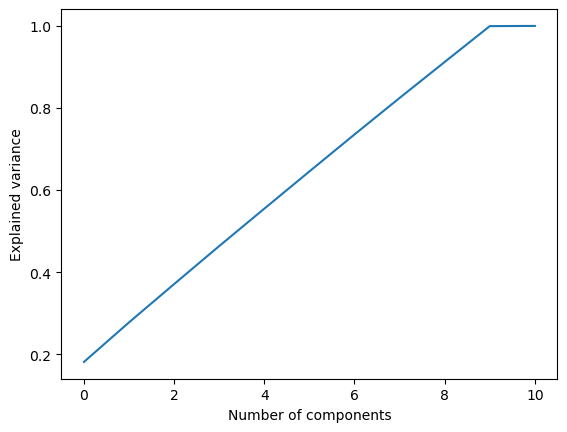

In [30]:
#plotted elbow plot to visualize contribution of each PC 
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

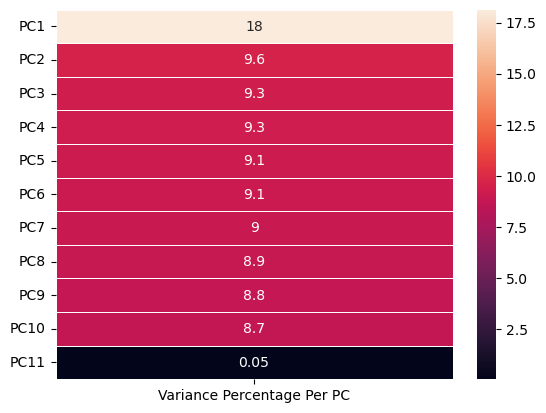

In [31]:
#heatmap to show; confirmation of reduction (Kamara,n.d.).
sn.heatmap(varx_df, annot=True, linewidth=0.5)
plt.show()

In [32]:
# Define highlighting conditional formating applied to covariance matrix (Unknown,2021).
def highlight_cells (val):
    if val > 0.9:
        color = 'purple'
    elif val > 0.6:
        color = 'green'
    else:
        color = ''
    return f"background: {color}"

# Generate covariance_matrix 
covariance_matrix = pd.DataFrame.cov(df_std_data)
#High correlated variables highlighted in purple
covariance_matrix.style.applymap(highlight_cells)

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
Population,1.000100,-0.007735,0.012245,-0.011710,0.007418,0.017587,0.008504,-0.006823,-0.008753,-0.002229,-0.009314
Children,-0.007735,1.000100,-0.027789,0.010157,0.004173,0.003089,-0.021716,0.008489,-0.005002,-0.008435,0.025496
Age,0.012245,-0.027789,1.000100,-0.003018,-0.008174,0.002150,0.015116,0.006624,0.016981,0.010730,-0.014725
Income,-0.011710,0.010157,-0.003018,1.000100,-0.009726,-0.007584,-0.000736,0.002464,0.000320,-0.005665,0.001807
Outage_sec_perweek,0.007418,0.004173,-0.008174,-0.009726,1.000100,0.002941,0.015938,0.004119,0.003082,0.020520,0.004356
Email,0.017587,0.003089,0.002150,-0.007584,0.002941,1.000100,0.003455,-0.015918,-0.014056,0.001587,-0.014220
Contacts,0.008504,-0.021716,0.015116,-0.000736,0.015938,0.003455,1.000100,-0.005883,0.002477,0.003881,0.002981
Yearly_equip_failure,-0.006823,0.008489,0.006624,0.002464,0.004119,-0.015918,-0.005883,1.000100,0.011357,-0.005779,0.011060
Tenure,-0.008753,-0.005002,0.016981,0.000320,0.003082,-0.014056,0.002477,0.011357,1.000100,-0.003337,0.991594
MonthlyCharge,-0.002229,-0.008435,0.010730,-0.005665,0.020520,0.001587,0.003881,-0.005779,-0.003337,1.000100,0.060412


In [33]:
#covariance_matrix
cov_matrix = np.dot(df_std.T, df_std)/pca_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

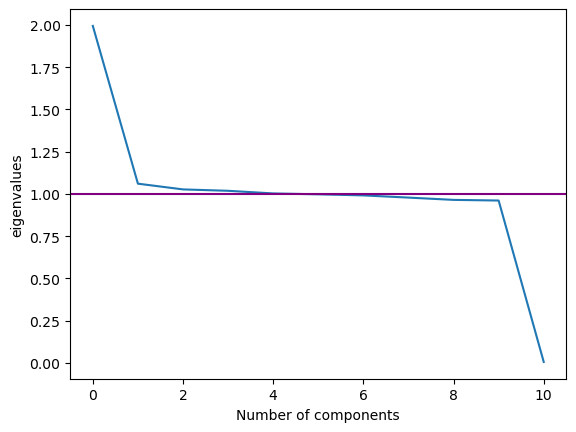

In [34]:
#plotting eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="purple")
plt.show()

In [35]:
#chart of Eigenvalues per PC
eigen= pca.explained_variance_
eigen_df = pd.DataFrame(eigen.round(2), columns=['Eigenvalues Per PC'],
                       index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                              'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
eigen_df

,Eigenvalues Per PC
PC1,1.99
PC2,1.06
PC3,1.03
PC4,1.02
PC5,1.00
PC6,1.00
PC7,0.99
PC8,0.98
PC9,0.96
PC10,0.96


In [36]:
#reduced PC
pca_final = PCA(n_components=6, random_state=397)
pca_final.fit_transform(df_std)

array([[-1.52627426, -0.28249885, -1.60166668, -0.3681253 ,  0.58805934,
        -1.33897586],
       [-1.65934365, -0.1086178 ,  0.9681424 , -1.36345462,  0.49565388,
        -1.32572172],
       [-0.89304657, -1.25776437,  0.08533259, -0.86171821,  1.41318147,
        -0.89928314],
       ...,
       [ 0.58494326, -0.90990097, -0.88054697,  0.58201517, -0.87859325,
        -1.07155638],
       [ 1.9869556 ,  1.90444291,  1.94191984,  0.02746571,  0.19446855,
        -0.6357024 ],
       [ 1.55203045,  1.06572196,  2.08910562,  0.26601863, -0.28318707,
        -0.74396204]])

In [37]:
#final loadings
loadings = pd.DataFrame(pca_final.components_.T,
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
index=df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Population,-0.013432,0.358192,0.218068,0.321068,0.414833,0.213914
Children,0.014336,-0.482973,0.399498,-0.027158,0.139763,0.155195
Age,0.001512,0.427676,-0.462298,0.046994,0.147135,-0.104545
Income,0.001715,-0.269166,-0.244079,-0.002601,-0.450979,0.530524
Outage_sec_perweek,0.006114,0.201072,0.452415,-0.564588,0.102763,0.262424
Email,-0.020448,0.216209,0.437521,0.428889,-0.013616,0.067701
Contacts,0.003559,0.434301,-0.094654,-0.159681,-0.175570,0.598694
Yearly_equip_failure,0.016245,-0.182210,-0.278065,-0.377251,0.664669,0.129007
Tenure,0.705376,0.008896,-0.018055,0.046636,0.014998,0.018558
MonthlyCharge,0.040509,0.272035,0.190872,-0.470188,-0.315791,-0.434624


In [38]:
#chart of captured variance per final PC
varx_final= pca_final.explained_variance_ratio_ * 100
varx_final_df = pd.DataFrame(varx_final.round(2), columns=['Variance Percentage Per PC, Final'],
                       index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
varx_final_df

,"Variance Percentage Per PC, Final"
PC1,18.13
PC2,9.64
PC3,9.33
PC4,9.26
PC5,9.12
PC6,9.07


In [39]:
#printing total percentage of final pc explained variances
print(sum(pca_final.explained_variance_ratio_ * 100).round(3))

64.545


In [40]:
df.to_csv(r'AFCodeD212Tk2_pca.csv')